In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pickle

# using static output example at the moment
with open('../outputs/1-5_examples_VLM_qwen.pkl','rb') as f:
    outputs = pickle.load(f)

# to run it with dynamic outputs, use the outputs from `CAIRE/src/outputs`

for output in outputs:
    output['image_path'] = "../../" + output['image_path']

In [30]:
labels = ['Green-headed Tanager', 'Jaguar', 'Feijoada', 'Jama Masjid', 'Jabuticaba']

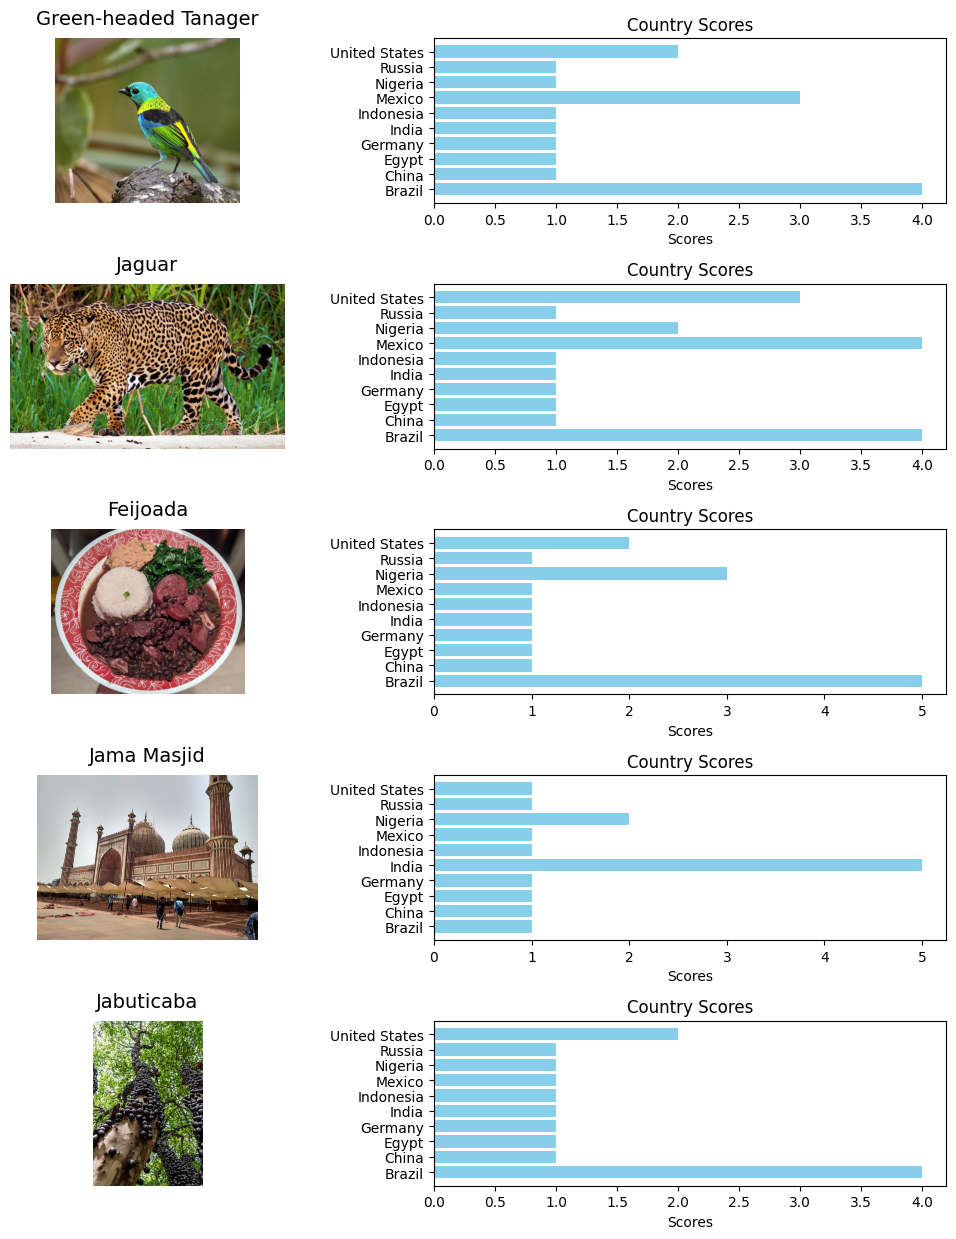

In [31]:
fig, axes = plt.subplots(len(outputs), 2, figsize=(10, 2.5 * len(outputs)), gridspec_kw={'width_ratios': [1, 1.5]})

for i, (output, label) in enumerate(zip(outputs, labels)):
    image_path = output['image_path']
    scores = output['values']

    countries = list(scores.keys())
    values = list(scores.values())

    img = Image.open(image_path)
    axes[i, 0].imshow(img)
    axes[i, 0].axis("off")
    axes[i, 0].set_title(label, fontsize=14, pad=10)

    y_pos = np.arange(len(countries))
    axes[i, 1].barh(y_pos, values, color='skyblue')
    axes[i, 1].set_yticks(y_pos)
    axes[i, 1].set_yticklabels(countries)
    axes[i, 1].set_xlabel("Scores")
    axes[i, 1].set_title("Country Scores")

plt.tight_layout()
plt.show()